## Assignment

Import necessary library

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt

Read the data

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [3]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [5]:
df_can['Total'] = df_can.sum(axis=1)

In [6]:
df_can.set_index("Country", inplace=True)

In [7]:
col_list_str = df_can.columns.values.tolist()
col_list_str = [str(x) for x in col_list_str]
df_can.columns = col_list_str

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [8]:
### type your answer here (10)
df_china_india = df_can.loc[["China", "India"], "1980":"2013"]
df_china_india = df_china_india.transpose()

Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

Text(0, 0.5, 'Number')

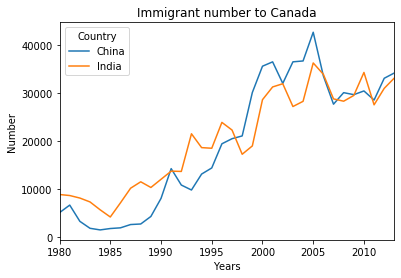

In [9]:
### type your answer here (10)
df_china_india.plot(kind="line")
plt.title("Immigrant number to Canada")
plt.xlabel("Years")
plt.ylabel("Number")

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [17]:
### type your answer here (10)
df_top5 = df_can.sort_values("Total", ascending=False).head()
df_top5 = df_top5.loc[:, "1980":"2013"]
df_top5 = df_top5.transpose()
df_top5.head(10)

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


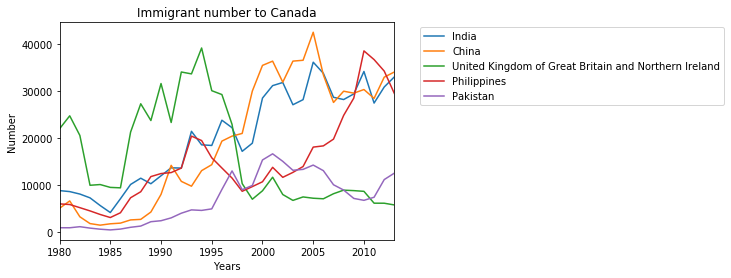

In [11]:
### type your answer here (10)
df_top5.plot(kind="line")
plt.title("Immigrant number to Canada")
plt.xlabel("Years")
plt.ylabel("Number")
plt.legend(loc="upper right", bbox_to_anchor=(2.0, 1.0))

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

Text(0, 0.5, 'Number')

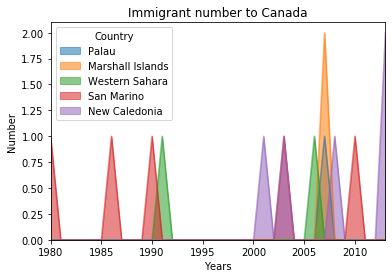

In [12]:
### type your answer here (10)
df_least5 = df_can.sort_values("Total").head()
df_least5 = df_least5.loc[:, "1980":"2013"]
df_least5 = df_least5.transpose()


### type your answer here (10)
df_least5.plot(kind="area", stacked=False, alpha=0.55)
plt.title("Immigrant number to Canada")
plt.xlabel("Years")
plt.ylabel("Number")



**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

Text(0, 0.5, 'Years')

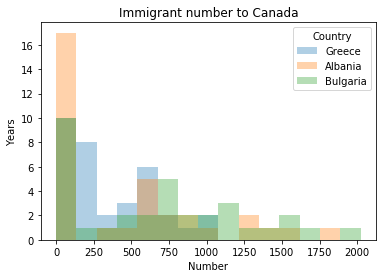

In [13]:
### type your answer here (10)
df_gab = df_can.loc[["Greece", "Albania", "Bulgaria"], "1980":"2013"]
df_gab = df_gab.transpose()

### type your answer here (10)
df_gab.plot(kind="hist", alpha=0.35, bins=15)
plt.title("Immigrant number to Canada")
plt.xlabel("Number")
plt.ylabel("Years")

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [14]:
### type your answer here (10)
df_top15 = df_can.sort_values("Total", ascending=False).head(15)
df_top15 = df_top15.loc[:, ["Total"]]
# df_top15 = df_top15.transpose()




In [15]:
total_val = df_top15["Total"].values.tolist()

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
   3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

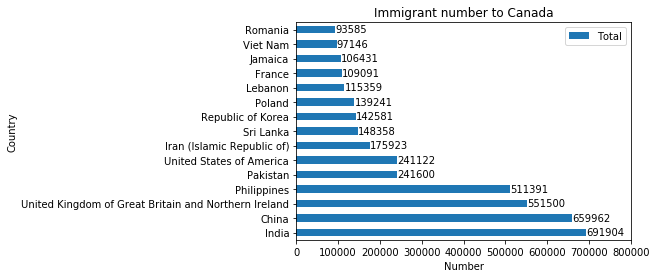

In [16]:
### type your answer here (10)

df_top15.plot(kind="barh")
plt.title("Immigrant number to Canada")
plt.xlabel("Number")
plt.xlim(0,800000)
for i in range(len(total_val)):
    plt.annotate('{}'.format(total_val[i]), # text to display
                 xy=(total_val[i],i-0.2),                    # start the text at at point (year 2008 , pop 30)
                )


# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).